In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
%matplotlib inline

- centroidLocation : coordinates of the centroids that will generate the random data

- numSamples : the # data points we want to generate, split over the # centroids

- clusterDeviation : the standard deviation between the clusters. Larger the number the further the spacing

In [13]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # store data in feature matrix x and response vector y
    x, y = make_blobs(n_samples = numSamples, centers = centroidLocation, cluster_std = clusterDeviation)
    # standardize features by removing the mean and scaling to unit variance
    x = StandardScaler().fit_transform(x)
    return x, y
    
x, y = createDataPoints([[4,3], [2,-1], [-1,4]], 1500, 0.5)

### Modeling

DBSCAN works based on two parameters

- Epsilon determines a specified radius that if includes enough # points within is called a dense area

- minimumSamples determine the minimum # data points we want in a neighborhood to define a cluster

In [14]:
epsilon = 0.3
minimumSamples = 7
dbscan = DBSCAN(eps = epsilon, min_samples = minimumSamples).fit(x)
labels = dbscan.labels_
labels

array([0, 1, 1, ..., 1, 2, 1], dtype=int64)

In [15]:
# replacing all elements in cluster with True and all outliers with False
coreSamplesMask = np.zeros_like(dbscan.labels_, dtype = bool)
coreSamplesMask[dbscan.core_sample_indices_] = True
coreSamplesMask

array([ True,  True,  True, ...,  True,  True,  True])

In [16]:
# number of clusters in labels, ignoring noise if present
nClusters = len(set(labels)) - (1 if -1 in labels else 0)
nClusters

3

In [17]:
# removing repitition in labels by turning it into a set
uniqueLabels = set(labels)
uniqueLabels

{-1, 0, 1, 2}

### Data Visualization

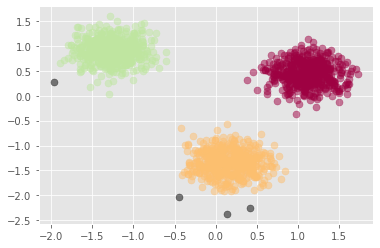

In [18]:
# colors for clusters
colors  = plt.cm.Spectral(np.linspace(0, 1, len(uniqueLabels)))

# plot points
for k, col in zip(uniqueLabels, colors):
    if k == -1:
        # black used for noise
        col = 'k'
        
    classMemberMask = (labels == k)
    
    # plot datapoints that are clustered
    xy = x[classMemberMask & coreSamplesMask]
    plt.style.use('ggplot')
    plt.scatter(xy[:,0], xy[:,1], s = 50, c = [col], marker = u'o', alpha = 0.5)
    
    # plot outliers
    xy = x[classMemberMask & ~coreSamplesMask]
    plt.style.use('ggplot')
    plt.scatter(xy[:,0], xy[:,1], s = 50, c = [col], marker = u'o', alpha = 0.5)

### DBSCAN Clustering over weather station dataset

In [19]:
import csv
import pandas as pd
import numpy as np

pdf = pd.read_csv('weather-stations.csv')
pdf.head(10)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,2.0,0.0,2.0,NaN,168.4,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
5,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,0.0,NaN,NaN,NaN,81.0,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710
6,GALIANO NORTH,48.985,-123.573,BC,8.9,7.0,NaN,13.5,7.0,2.0,7.0,0.0,7.0,NaN,110.0,7.0,NaN,0.0,10.0,NaN,NaN,NaN,191.7,0.0,10130MN
7,MALAHAT,48.575,-123.530,BC,7.2,1.0,NaN,12.7,1.0,2.2,0.0,NaN,NaN,NaN,108.8,10.0,NaN,NaN,12.0,NaN,NaN,NaN,290.8,0.0,1014820
8,METCHOSIN,48.374,-123.561,BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,102.6,0.0,95.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,1015105
9,NORTH COWICHAN,48.824,-123.718,BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,142.8,0.0,114.0,0.0,13.0,NaN,NaN,NaN,NaN,NaN,1015628


In [20]:
pdf = pdf[pd.notnull(pdf['Tm'])]
pdf = pdf.reset_index(drop = True)
pdf.head(10)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,2.0,0.0,2.0,NaN,168.4,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,0.0,NaN,NaN,NaN,81.0,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710
5,GALIANO NORTH,48.985,-123.573,BC,8.9,7.0,NaN,13.5,7.0,2.0,7.0,0.0,7.0,NaN,110.0,7.0,NaN,0.0,10.0,NaN,NaN,NaN,191.7,0.0,10130MN
6,MALAHAT,48.575,-123.530,BC,7.2,1.0,NaN,12.7,1.0,2.2,0.0,NaN,NaN,NaN,108.8,10.0,NaN,NaN,12.0,NaN,NaN,NaN,290.8,0.0,1014820
7,NORTH COWICHAN,48.824,-123.719,BC,7.7,0.0,NaN,14.7,0.0,-2.6,0.0,NaN,NaN,NaN,132.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,288.8,0.0,1015630
8,NORTH PENDER ISLAND,48.764,-123.287,BC,8.6,1.0,NaN,14.0,1.0,2.0,1.0,0.0,1.0,NaN,91.1,1.0,NaN,0.0,13.0,NaN,NaN,NaN,253.6,0.0,1015638
9,RACE ROCKS,48.298,-123.531,BC,9.6,0.0,NaN,15.6,0.0,5.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.7,0.0,1016640


In [21]:
from mpl_toolkits.basemap import Basemap
from pylab import rcParams

rcParams['figure.figsize'] = (14, 10)

llon = -140
ulon = -50
llat = 40
ulat = 65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) & (pdf['Lat'] < ulat)]

myMap = Basemap(projection = 'merc', resolution = 'l', area_thresh = 1000.0, 
                llcrnrlon = llon, llcrnrlat = llat, urcrnclon = ulon, urcrnrlat = ulat)
myMap.drawcoastlines()
myMap.drawcountries()
myMap.fillcontinents(color = 'white', alpha = 0.3)
myMap.shadedrelief()

# collect data based on stations
xs, ys = myMap(np.asarray(pdf.Long), np.asarry(pdf.Lat))
pdf['xm'] = xs.tolist()
pdf['ym'] = ys.tolist()

# visualization
for index, row in pdf.iterrows():
    myMap.plot(row.xm, row.ym, markerfacecolor = (p[1,0,0]), marker = 'o', markersize = 5, alpha = 0.75)

plt.style.use('ggplot')
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement basemap (from versions: none)
ERROR: No matching distribution found for basemap
